# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

#Reads in data
df = pd.read_csv('agaricus-lepiota.csv')
X = pd.get_dummies(df) #Because the data is purely catigorical, turns it to numerical 

best_score = 0
best_n = 0

n_start = 2
n_end = 30

scores = []

#Calculates the metric score for different clusters
for i in range(2,30):
    kmeans_model = KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(X)
    labels = kmeans_model.labels_

    score = metrics.silhouette_score(X, labels, metric='euclidean')
    scores.append(score)

    if(score > best_score):
        best_score = score
        best_n = i

print("Optimal number of clusters = {}   Score = {}".format(best_n, best_score))


Optimal number of clusters = 9   Score = 0.3087943219482539


Text(0.5, 0, 'Number of clusters')

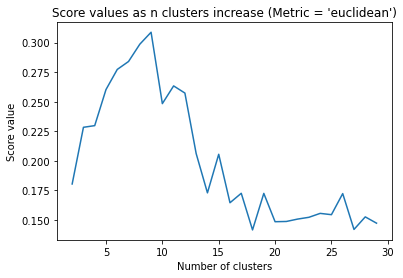

In [42]:
n_clusters_range = np.arange(n_start, n_end)

plt.plot(n_clusters_range, scores)
plt.title("Score values as n clusters increase (Metric = 'euclidean')")
plt.ylabel("Score value")
plt.xlabel("Number of clusters")

Original space: (8124, 119)
PCA space: (8124, 2)


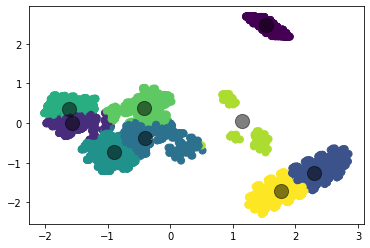

In [68]:
from sklearn import decomposition

#Projects the data to 2D wiht PCA
print("Original space:", X.shape)
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)
print("PCA space:", Xpca.shape)

#Clusters new matrix with k-means
kmeans_model = KMeans(n_clusters=best_n, random_state=1)
kmeans_model.fit(Xpca)
y_kmeans = kmeans_model.predict(Xpca)

#Plots the data in 2D
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
